In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import sys
import pickle
import yaml
import dcargs
import pandas as pd

sys.path.append("..") 

from experiment import ExperimentParameters
import glob
from tqdm import tqdm
from yaml.loader import SafeLoader

import postpro_centrality_certainty as postpro

# path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/"
default_path = "/home/mohsen/Project/colab/collective-decison-making-with-direl/results/hpc_mount/"
experiment_name = "N100_2023-09-15-16-19-36_certainty_search_Naive_centralized_random_fixed_mdeg"
experiment_name = "N100_2023-09-15-18-09-46_certainty_search_Bayes_centralized_random_fixed_mdeg"

# # command for mounting hpc 
#  sshfs m.raoufi.s@gateway.hpc.tu-berlin.de:/home/users/m/m.raoufi.s/colab/collective-decison-making-with-direl/results /home/mohsen/Project/colab/collective-decison-making-with-direl/results/hpc_mount/


path = default_path + experiment_name 

sys.path.append(path)


In [3]:
df = pd.read_pickle(path + "/processed_results.pickle")

<AxesSubplot: xlabel='scalar_param1', ylabel='Netw_std_degree'>

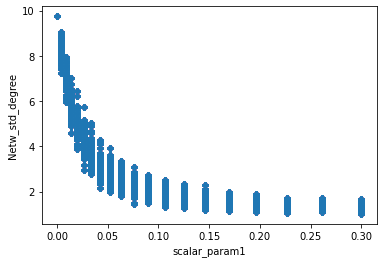

In [4]:
import seaborn as sns   
# sns.scatterplot(df, x="scalar_param1", y="Netw_mean_degree",alpha=0.1,hue="weight_own_belief")
sns.scatterplot(df, x="scalar_param1", y="Netw_std_degree",alpha=0.01)
# sns.scatterplot(df, x="scalar_param1", y="Netw_mean_eigVal",alpha=0.01)
# sns.scatterplot(df[df["weight_own_belief"]==1.0], x="scalar_param1", y="Netw_mean_eigVal",alpha=0.01)


0.013807823700733805
0
1
2
3
4
5
6
7
8
9
10


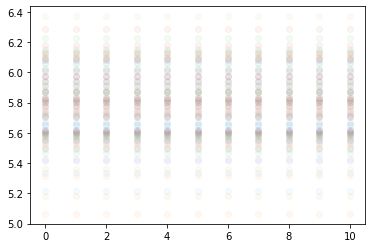

In [84]:
# print(df.keys())
# print(len(df))
val_arr = df.range_agent_measurement_noise.unique()
df_filtered = df[df["range_agent_measurement_noise"]==val_arr[4]]
# len(df_filtered)
df['Netw_eigVals_vs_time']
sc_param1_arr = df['scalar_param1'].unique()
for sc_param in sc_param1_arr[3:4]:
    print(sc_param)
    # print(df[df['scalar_param1']==sc_param])
    df_tmp = df_filtered[df_filtered['scalar_param1']==sc_param].copy()
    for t in df_tmp['Timestep'].unique():
        print(t)
        # print(df_tmp.loc[df_tmp['Timestep']==t,'Netw_eigVals_vs_time'])
        df_tmp_at_time = df_tmp[df_tmp['Timestep']==0]['Netw_eigVals_vs_time']
        for row in df_tmp_at_time:
            norm_eigVal = np.linalg.norm(row)
            # print("timestep: ",t, ", norm_eigVal: ",norm_eigVal)
            plt.scatter(t*np.ones(norm_eigVal.shape),norm_eigVal,alpha=0.05)

    

In [19]:
from multiprocessing import Pool
import networkx as nx


# experiment_name = "2022-11-24-15-26-41_test_grid_search_Naive"
# experiment_name = "N100_2023-04-18-11-16-30_test_grid_search_BayesCI_centralized_random/results"
# experiment_name = "N100_2023-08-18-17-24-37_network_search_Bayes_centralized_random_fixed_mdeg/results"

experiment_name = ("N100_2023-08-18-17-24-37_network_search_Bayes_centralized_random_fixed_mdeg/results/"
"envstd_3_mnint_0_mncenter_0_np1_8_ow_0_a_n_0_run_61")


# non-fixed-mdeg
experiment_name = ("N100_2023-10-19-20-42-55_certainty_search_Bayes_centralized_random/results/"
                   "envstd_0_mnint_1_mncenter_0_np1_19_ow_0_a_n_0_corr_0_run_96")

# correlated
experiment_name = ("N100_2023-09-30-01-13-40_correlation_search_Bayes_centralized_random_fixed_mdeg/results/"
                   "envstd_0_mnint_0_mncenter_0_np1_8_ow_0_a_n_0_corr_8_run_96")


# experiment_name = ("N100_2023-09-15-18-09-46_certainty_search_Bayes_centralized_random_fixed_mdeg/results/"
# "envstd_3_mnint_0_mncenter_0_np1_3_ow_0_a_n_0_run_60")

experiment_folder_path = default_path + "/" + experiment_name 

base_file_path = experiment_folder_path

pathes = glob.glob(os.path.join(base_file_path, "*"))
# print(pathes)
print("-------------------")
# n_file_to_read = 1205; # BayesCI
n_file_to_read = 1
print(pathes[n_file_to_read])
file_path = pathes[n_file_to_read]

from importlib import reload

reload(postpro)
df_tmp = None
df_tmp = postpro.post_pro_network_centrality_certainty(file_path)


-------------------
/home/mohsen/Project/colab/collective-decison-making-with-direl/results/hpc_mount//N100_2023-09-30-01-13-40_correlation_search_Bayes_centralized_random_fixed_mdeg/results/envstd_0_mnint_0_mncenter_0_np1_8_ow_0_a_n_0_corr_8_run_96/data.pickle5


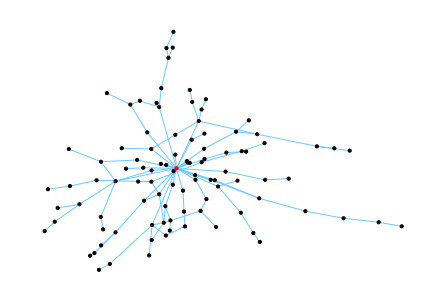

Text(0, 0.5, 'eig_val')

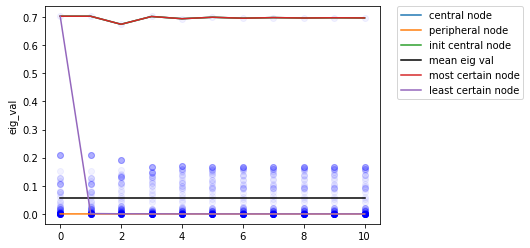

In [20]:
%matplotlib inline

adjc_0 = df_tmp.adjc_time[0]
G_0 = nx.from_numpy_array(adjc_0)
postpro.draw_network_color_nodes_on_degree(G_0)
plt.show()
df_tmp.centrality_central_node.plot(label="central node")
df_tmp.centrality_peripheral_node.plot(label="peripheral node")
# print(df_tmp.keys())


# df_tmp.confident_init_central_node.plot(label="init central node")
df_tmp.centrality_init_central_node.plot(label="init central node")

df_tmp.Netw_mean_centrality.plot(color='k', label="mean eig val")

df_tmp.centrality_most_cert_node.plot(label="most certain node")
df_tmp.centrality_least_cert_node.plot(label="least certain node")

for t in df_tmp['Timestep'].unique():
    # print(df_tmp["centrality_time"][t])
    centrality = df_tmp["centrality_time"][t]
    # print(eigVals)
    # eigVals = np.abs(eigVals)
    # print(eigVals)
    plt.scatter(t*np.ones(100),centrality,alpha=0.05,c="b")
    # plt.scatter(t*np.ones(100),df_tmp["Netw_eigVals_vs_time"][t],alpha=0.1,c="b")
    # print(np.sort(df_tmp["Netw_eigVals_vs_time"][t])==np.sort(df_tmp["Netw_eigVals_vs_time"][t+1]))
    # plt.scatter(t,df_tmp["Netw_eigVals_vs_time"][t][df_tmp["confident_central_node"]],alpha=0.1,c="b")



# add legend outside the plot   
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel("eig_val")

check the evolution of A

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


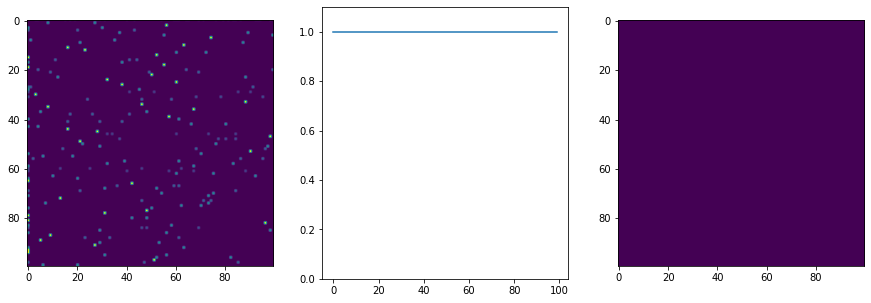

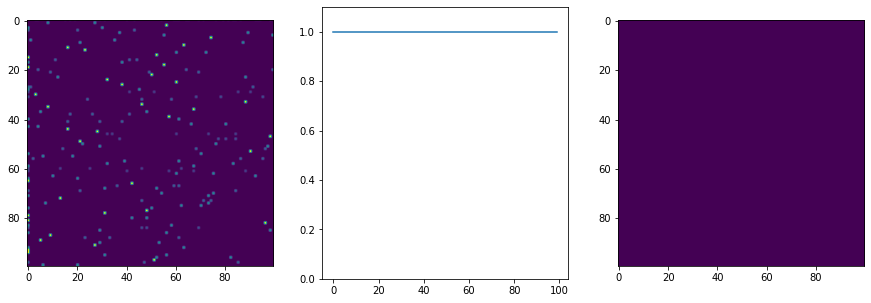

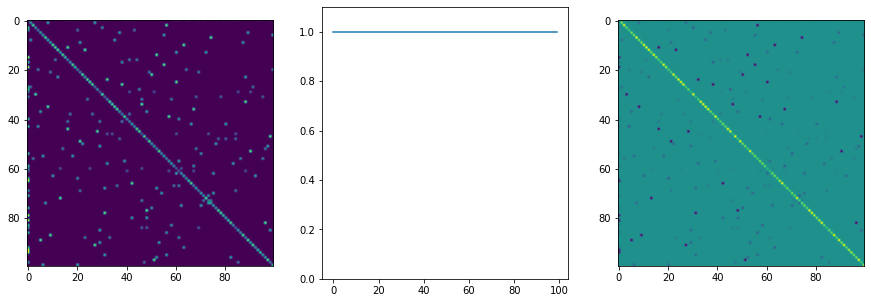

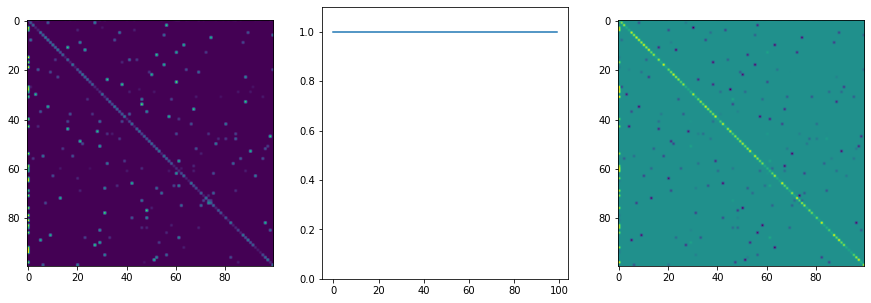

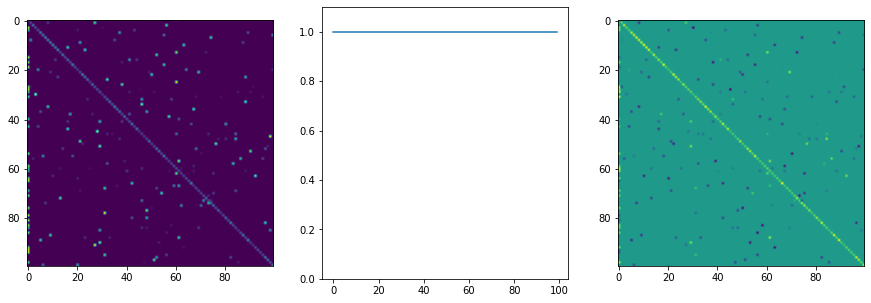

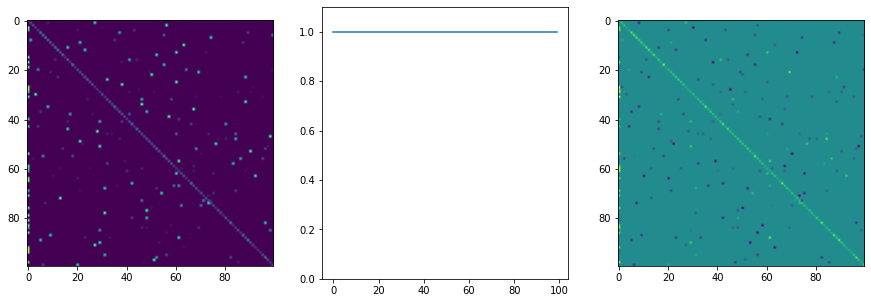

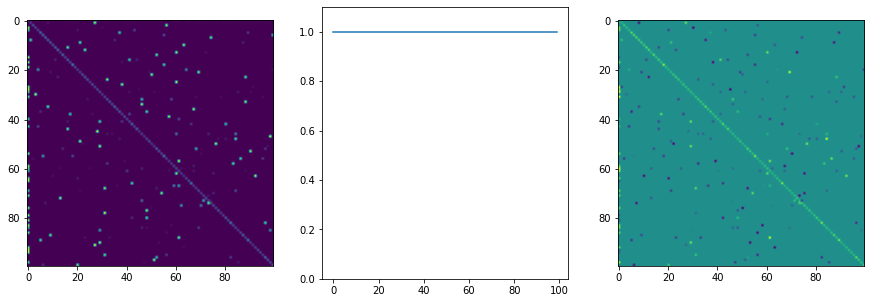

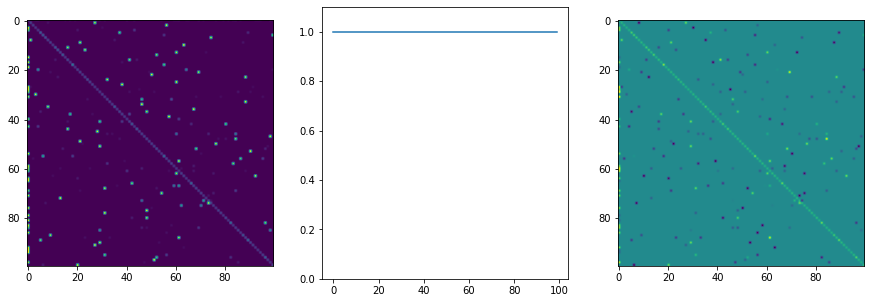

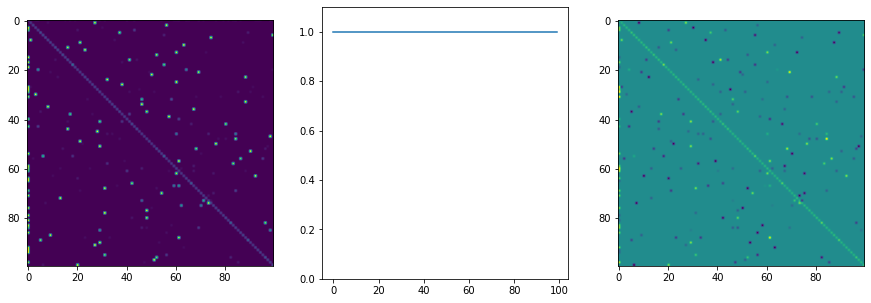

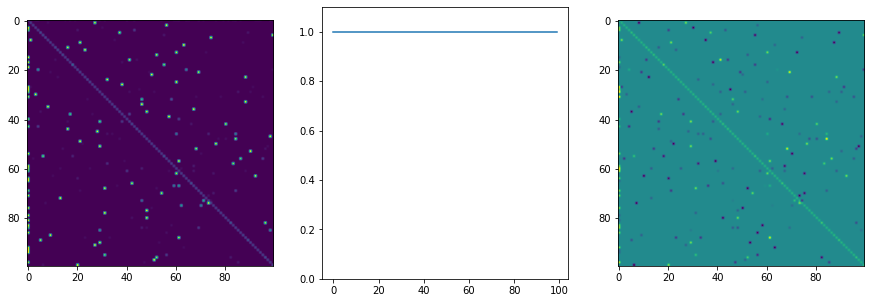

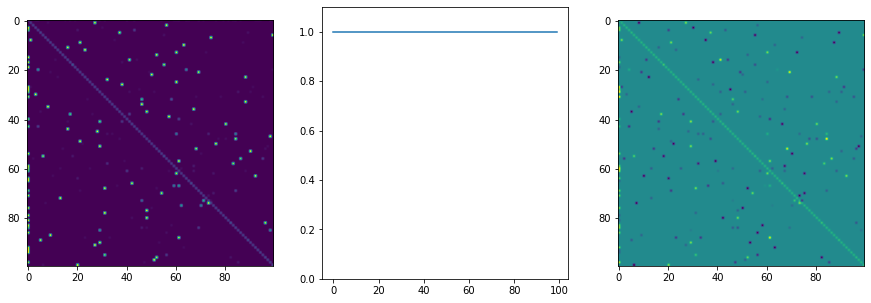

In [26]:
A0 = df_tmp.adjc_time[0]
print(np.sum(A0,axis=1))
for t in df_tmp['Timestep'].unique():
    A = df_tmp.adjc_time[t]
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].imshow(A)
    ax[1].plot(np.sum(A,axis=1))
    ax[1].set_ylim([0, 1.1])
    diff_A = A - A0

    ax[2].imshow(diff_A)
    plt.show()
# plt.imshow(A0)
# print(A0)
# A_to_10 = A0**10
# print(A_to_10)


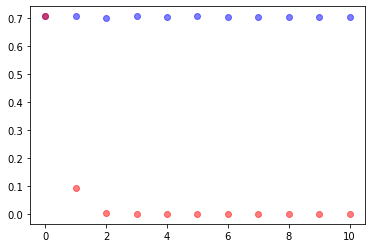

In [49]:
for t in df_tmp['Timestep'].unique():
    # print(df_tmp["Netw_eigVals_vs_time"][t])
    centrality = df_tmp["Netw_eigVals_vs_time"][t]
    # print(eigVals)
    # eigVals = np.abs(eigVals)
    # print(eigVals)
    plt.scatter(t,centrality[df_tmp.ind_most_cert_node[t]],alpha=0.5,c="b",label="most certain node")
    plt.scatter(t,centrality[df_tmp.ind_least_cert_node[t]],alpha=0.5,c="r",label="least certain node")

eig vec normed, and non-normed match in  100  elements


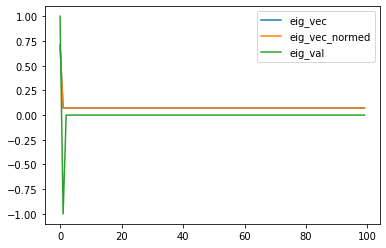

In [78]:
G = nx.star_graph(100-1)

eig_vec = np.array(list(nx.eigenvector_centrality(G).values()))

GG = nx.adjacency_matrix(G).toarray()
row_sums = GG.sum(axis=1)
row_sums[row_sums==0] = 1
row_sums[np.isinf(row_sums)] = 1
G2 = GG / row_sums[:, np.newaxis]
G_normed = nx.from_numpy_array(G2)

eig_vec_normed = np.array(list(nx.eigenvector_centrality(G_normed,weight='weight').values()))

eigVal = np.linalg.eigvals(G2)

plt.plot(eig_vec,label="eig_vec")
plt.plot(eig_vec_normed,label="eig_vec_normed")
plt.plot(eigVal,label="eig_val")
print("eig vec normed, and non-normed match in ", np.sum(eig_vec_normed==eig_vec), " elements")
plt.legend()
plt.show()

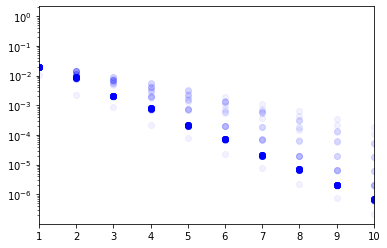

In [55]:
for t in df_tmp['Timestep'].unique():
    uncert_vals = df_tmp["uncertainty_arr"][t]
    plt.scatter(t*np.ones(100),uncert_vals,alpha=0.05,c="b")

plt.yscale("log")
plt.xlim([1,10]);

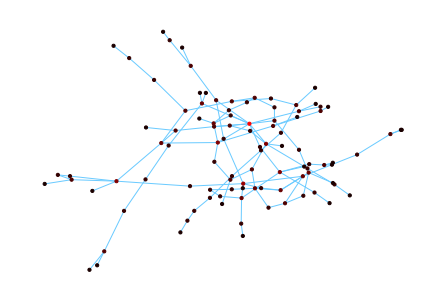

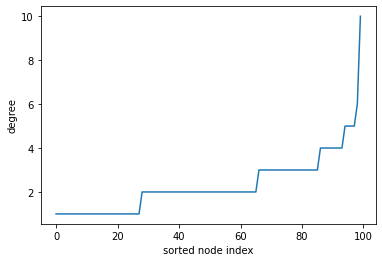

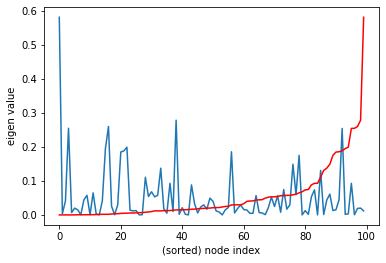

index central node:  0
index peripheral node:  26


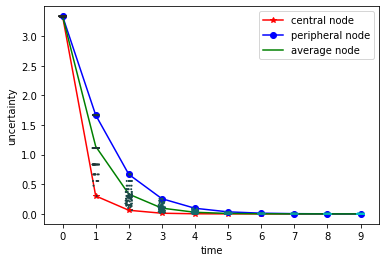

In [49]:
import seaborn as sns

df_tst.adjc_time[1].shape

G = nx.from_numpy_array(df_tst.adjc_time[1])
GG = nx.adjacency_matrix(G).toarray() 

# # For Naive we should remove the self links and make the G based on that
GG = GG - np.diag(np.diag(GG))
G = nx.from_numpy_array(GG)


# print(G, flush=True)
degreeDist = np.array(G.degree())[:, 1]
clustCoef = np.array(list(nx.clustering(G).values()))
eigVec = np.array(list(nx.eigenvector_centrality_numpy(G).values()))

row_sums = GG.sum(axis=1)
row_sums[row_sums==0] = 1
row_sums[np.isinf(row_sums)] = 1
G2 = GG / row_sums[:, np.newaxis]
eigVal = np.linalg.eigvals(G2)
eigVal[np.isinf(eigVal)] = np.iinfo(np.int16).max

# nx.draw(G, with_labels=False)
draw_network_color_nodes_on_degree(G)
plt.show()

plt.plot(np.sort(degreeDist))
plt.xlabel('sorted node index')
plt.ylabel('degree')
fig = plt.gcf()
fig.set_facecolor('white')
plt.show()

plt.plot(eigVec)
plt.plot(np.sort(eigVec),'r')
plt.xlabel('(sorted) node index')
plt.ylabel('eigen value')
fig = plt.gcf()
fig.set_facecolor('white')
plt.show()

# find the node with largest eigVec: central node
ind_central = np.argmax(eigVec)
print("index central node: ", ind_central)

# find the node with smallest eigVec: peripheral node
ind_peripheral = np.argmin(eigVec)
print("index peripheral node: ", ind_peripheral)

confident_central_node = []
confident_peripheral_node = []
confident_all_nodes = []
confident_avg_nodes = []
for time_ind in range(1,11):
    confident_central_node.append(df_tst.confidence_arr[time_ind][ind_central])
    confident_peripheral_node.append(df_tst.confidence_arr[time_ind][ind_peripheral])
    confident_all_nodes.append(df_tst.confidence_arr[time_ind][:])
    confident_avg_nodes.append(np.mean(df_tst.confidence_arr[time_ind][:]))

# plt.plot(np.arange(0,10), confident_all_nodes,'c.', markersize=1);
sns.stripplot(data=confident_all_nodes, jitter=0.1, size=2, palette='dark:c')
plt.plot(confident_central_node, 'r-*', label='central node')
plt.plot(confident_peripheral_node, 'b-o', label='peripheral node')
plt.plot(np.arange(0,10), confident_avg_nodes,'g-', label='average node')
plt.xlabel('time')
plt.ylabel('uncertainty')
# plt.yscale("log")
# set face color to white
ax = plt.gca()
ax.set_facecolor('white')
# set face color of the fig white
fig = plt.gcf()
fig.set_facecolor('white')
# plt.ylim([1e-14, 1e-3])
# print(plt.ylim())
plt.legend()
plt.show()





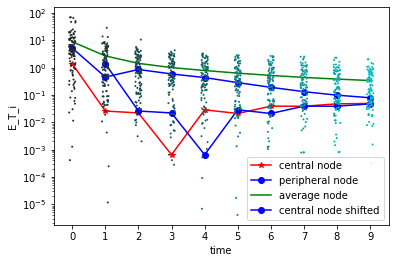

In [50]:
E_T_central_node = []
E_T_peripheral_node = []
E_T_all_nodes = []
E_T_avg_nodes = []
for time_ind in range(1,11):
    E_T_central_node.append(df_tst.E_T_all_nodes[time_ind][ind_central])
    E_T_peripheral_node.append(df_tst.E_T_all_nodes[time_ind][ind_peripheral])
    E_T_all_nodes.append(df_tst.E_T_all_nodes[time_ind][:])
    E_T_avg_nodes.append(np.mean(df_tst.E_T_all_nodes[time_ind][:]))


sns.stripplot(data=E_T_all_nodes, jitter=0.1, size=2, palette='dark:c')
plt.plot(E_T_central_node, 'r-*', label='central node')
plt.plot(E_T_peripheral_node, 'b-o', label='peripheral node')
plt.plot(np.arange(0,10), E_T_avg_nodes,'g-', label='average node')

E_T_central_node = np.roll(E_T_central_node,1)
E_T_central_node[0] = np.nan
plt.plot(E_T_central_node, 'b-o', label='central node shifted')

plt.xlabel('time')
plt.ylabel('E_T_i')
plt.yscale("log")
# set face color to white
ax = plt.gca()
ax.set_facecolor('white')
# set face color of the fig white
fig = plt.gcf()
fig.set_facecolor('white')
# print(plt.ylim())
plt.legend()
plt.show()

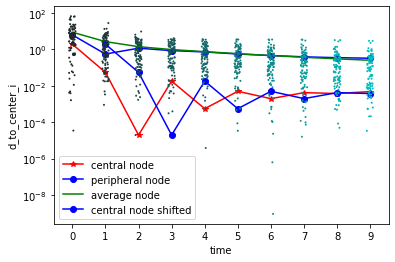

In [51]:
d_to_center_central_node = []
d_to_center_peripheral_node = []
d_to_center_all_nodes = []
d_to_center_avg_nodes = []
for time_ind in range(1,11):
    d_to_center_central_node.append(df_tst.dist_to_center_all_nodes[time_ind][ind_central])
    d_to_center_peripheral_node.append(df_tst.dist_to_center_all_nodes[time_ind][ind_peripheral])
    d_to_center_all_nodes.append(df_tst.dist_to_center_all_nodes[time_ind][:])
    d_to_center_avg_nodes.append(np.mean(df_tst.dist_to_center_all_nodes[time_ind][:]))


sns.stripplot(data=d_to_center_all_nodes, jitter=0.1, size=2, palette='dark:c')
plt.plot(d_to_center_central_node, 'r-*', label='central node')
plt.plot(d_to_center_peripheral_node, 'b-o', label='peripheral node')
plt.plot(d_to_center_avg_nodes,'g-', label='average node')

d_to_center_central_node = np.roll(d_to_center_central_node,1)
d_to_center_central_node[0] = np.nan
plt.plot(d_to_center_central_node, 'b-o', label='central node shifted')


plt.xlabel('time')
plt.ylabel('d_to_center_i')
plt.yscale("log")
# set face color to white
ax = plt.gca()
ax.set_facecolor('white')
# set face color of the fig white
fig = plt.gcf()
fig.set_facecolor('white')
plt.legend()
plt.show()

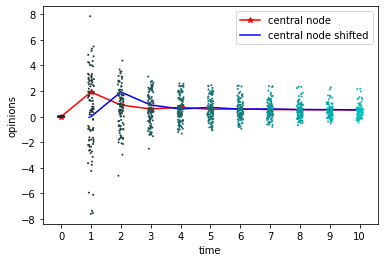

In [52]:
z_central_node = []
z_all = []
for time_ind in range(0,11):
    z_all.append(df_tst.z_arr_time[time_ind][:])
    z_central_node.append(df_tst.z_arr_time[time_ind][ind_central])
sns.stripplot(data=z_all, jitter=0.1, size=2, palette='dark:c')
plt.plot(z_central_node, 'r-*', label='central node')
# plot shifted z_central by 1 index
z_central_shifted = np.roll(z_central_node,1)
z_central_shifted[0] = np.nan
plt.plot(z_central_shifted, 'b-', label='central node shifted')

plt.xlabel('time')
plt.ylabel('opinions')
# set face color to white
ax = plt.gca()
ax.set_facecolor('white')
# set face color of the fig white
fig = plt.gcf()
fig.set_facecolor('white')
plt.legend()
plt.show()

average displacement:  7.236207398176194 , for central node:  5.303435802459717


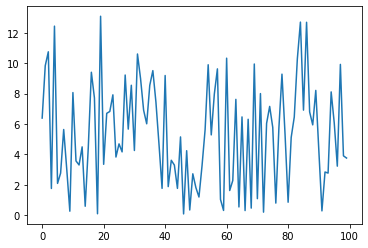

In [144]:
diff_z_tf = np.abs(df_tst.z_arr[10][:] - df_tst.z_arr[0][:])
diff_z_tf_central_node = diff_z_tf[ind_central]

diff_z_all = np.diff(z_all, axis=0)

abs_diff_z_all = np.abs(diff_z_all)
sum_over_t_abs_diff_z = np.sum(abs_diff_z_all, axis=0)
avg_sum_over_t_abs_diff_z = np.mean(sum_over_t_abs_diff_z)
print("average displacement: ", avg_sum_over_t_abs_diff_z, ", for central node: ", sum_over_t_abs_diff_z[ind_central])



plt.plot(diff_z_tf)

average dot product:  0.46
-27.563913097239176


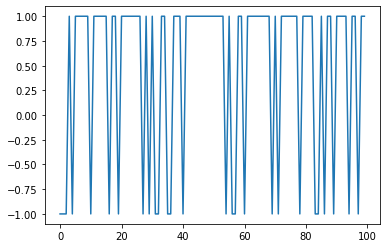

In [163]:
moved_vector_all = z_all[9] - z_all[0]
center_moved_vec = np.mean(z_all[9]) - np.mean(z_all[0])
# central_moved_vec = moved_vector_all[ind_central]

dot_prod_all = np.dot(moved_vector_all, center_moved_vec)
central_dot_prod = dot_prod_all[ind_central]

sign_dot_prod_all = np.sign(dot_prod_all)
print("average dot product: ", np.mean(sign_dot_prod_all))

# plt.plot(dot_prod_all)
plt.plot(np.sign(dot_prod_all))
print(central_dot_prod)
# plt.plot(np.sign(moved_vector_all))

In [145]:
print(z_central_shifted)
print(z_central_node)

[         nan -11.68758106 -10.37201023  -9.34878826  -8.55294895
  -7.9339633   -7.45252991  -7.07808161  -6.78684425  -6.5603261 ]
[-11.687581062316895, -10.372010231018066, -9.348788261413574, -8.552948951721191, -7.933963298797607, -7.4525299072265625, -7.0780816078186035, -6.786844253540039, -6.560326099395752, -6.384145259857178]


/tmp/ipykernel_452060/4045757713.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


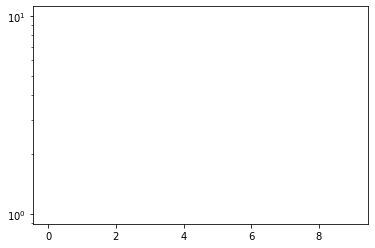

In [146]:
# plot the distance between the central node and the peripheral node
diff_certainty_min_max = np.array(confident_peripheral_node)-np.array(confident_central_node)
plt.plot(diff_certainty_min_max, 'r-*', label='diff certainty')
plt.yscale("log")

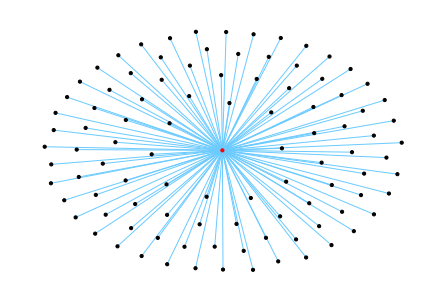

In [147]:
pos = nx.spring_layout(G, k=0.1, iterations=5000)
# pos = nx.spectral_layout(G)
# pos = nx.spring_layout(G, k=0.01, iterations=2, pos=pos)
# pos = nx.spiral_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.random_layout(G)
# pos = nx.kamada_kawai_layout(G)
# pos = nx.circular_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
# pos = nx.planar_layout(G)
# pos = nx.rescale_layout(G)
# pos = nx.bipartite_layout(G)
# pos = nx.multipartite_layout(G)
    
node_color = []
degree_dist = np.array(G.degree())[:,1]
for i_node in G.nodes():
    node_color.append((degree_dist[i_node]/degree_dist.max(),0,0))
options = {
    "node_color": node_color, #"#A0CBE2",
    "edge_color": "#6BCBFF",
    "width": 1,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
    "node_size": 1000/G.number_of_nodes(),
}

nx.draw(G, pos, **options)